# First read the VNA frequency scan CSV files

In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def read_csv_files(directory, target_frequency):
    plot_data = {}
    for filename in os.listdir(directory):
        if filename.endswith('.csv') and ('FS' in filename or 'VNA' in filename) and '11' in filename:
            date = filename[:6]
            filepath = os.path.join(directory, filename)
            df = pd.read_csv(filepath)
            row = df[df.iloc[:, 0] == target_frequency]
            if not row.empty:
                wp = 'wp1' if 'wp1' in filename else 'wp0'
                linestyle = '--' if wp == 'wp1' else '-'
                color_start = filename.find(wp) + 3
                color_end = filename.find('FS') if 'FS' in filename else filename.find('VNA')
                color = filename[color_start:color_end]
                color = 'pink' if color == 'p' else 'grey' if color == 'w' else color
                if wp not in plot_data:
                    plot_data[wp] = {}
                if color not in plot_data[wp]:
                    plot_data[wp][color] = {}
                if date not in plot_data[wp][color]:
                    plot_data[wp][color][date] = {}
                for column in df.columns[1:]:
                    if column not in plot_data[wp][color][date]:
                        plot_data[wp][color][date][column] = row[column].values[0]
    return plot_data



# Prepare the env data CSV file for date matching 

In [7]:

def read_processed_output(processed_output_file, x_axis_variable):
    processed_df = pd.read_csv(processed_output_file)
    env_data = {}
    for index, row in processed_df.iterrows():
        date = row['Date']
        env_info = row[x_axis_variable]
        env_data[date] = env_info
    return env_data


# Prepare the plotting function
Takes the columns from the prepared env csv file and uses them as the x axis in replacement to the dates from the FS variables

In [3]:
def plot_data(plot_data, env_data, target_frequency, x_axis_variable, variable_keywords=None, colors=None):
    for wp, colors_dict in plot_data.items():
        for color, dates in colors_dict.items():
            if colors and color not in colors:
                continue
            for column in next(iter(dates.values())).keys():
                if variable_keywords and not any(keyword.lower() in column.lower() for keyword in variable_keywords):
                    continue
                plt.figure()
                sorted_dates = sorted(dates.keys())
                for date in sorted_dates:
                    columns = dates[date]
                    formatted_date = f"20{date[4:6]}-{date[:2]}-{date[2:4]}"
                    if column in columns and formatted_date in env_data:
                        plt.plot(env_data[formatted_date], columns[column], 'o', linestyle='--' if wp == 'wp1' else '-', label=date)
                plt.xlabel(x_axis_variable)
                plt.ylabel(column)
                plt.title(f'{column} at {target_frequency} Hz - {wp} - {color.replace("grey", "white")}')
                plt.legend()
                plt.show()



# Run the plotting script 
By grabbing the updated env csv and FS files

In [4]:
def plot_data_with_dates(directory, target_frequency, x_axis_variable, processed_output_file, variable_keywords=None, colors=None):
    plot_data_dict = read_csv_files(directory, target_frequency)
    env_data_dict = read_processed_output(processed_output_file, x_axis_variable)
    plot_data(plot_data_dict, env_data_dict, target_frequency, x_axis_variable, variable_keywords, colors)



# User usage below

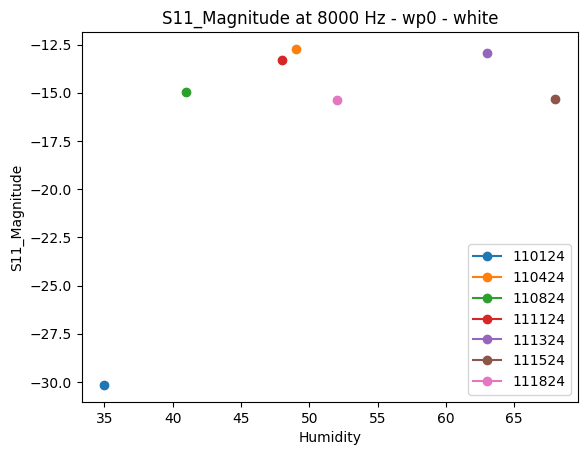

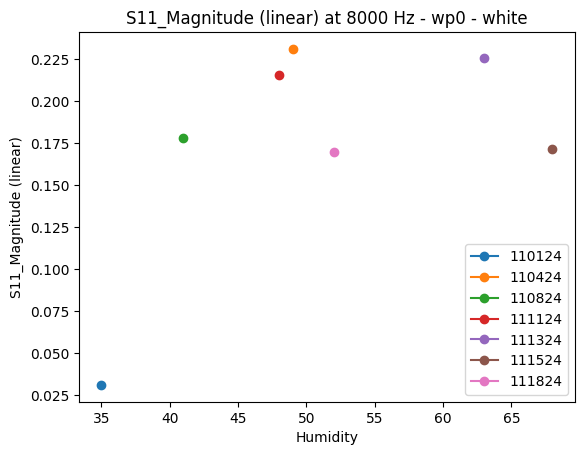

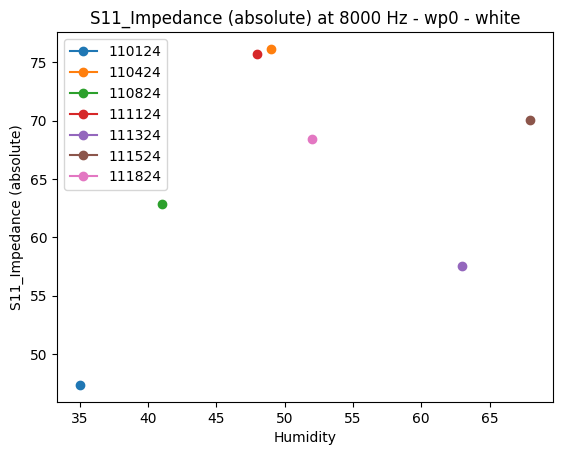

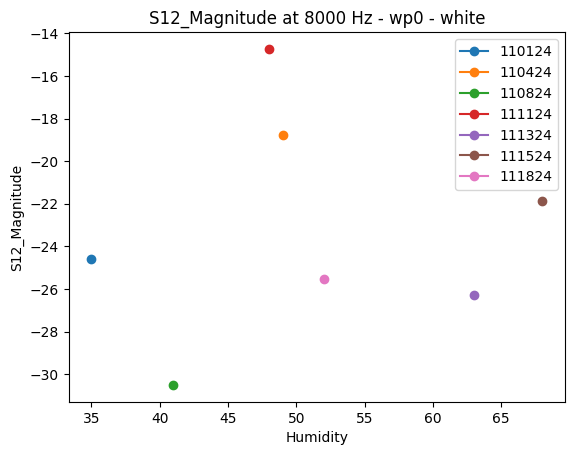

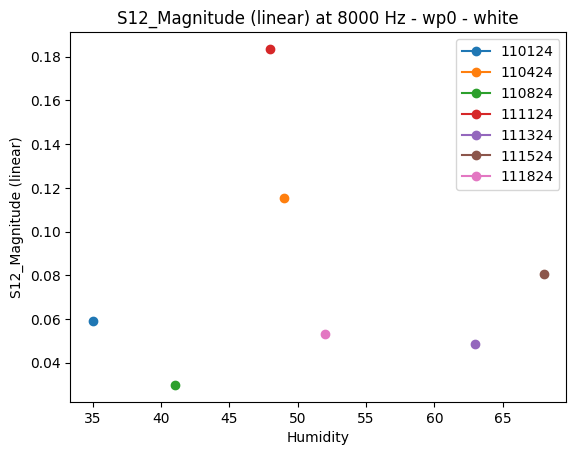

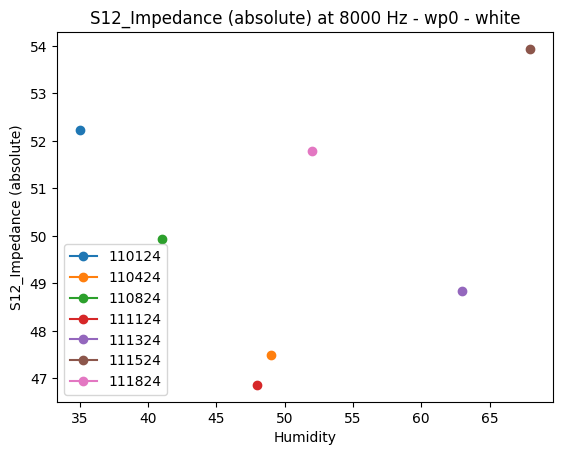

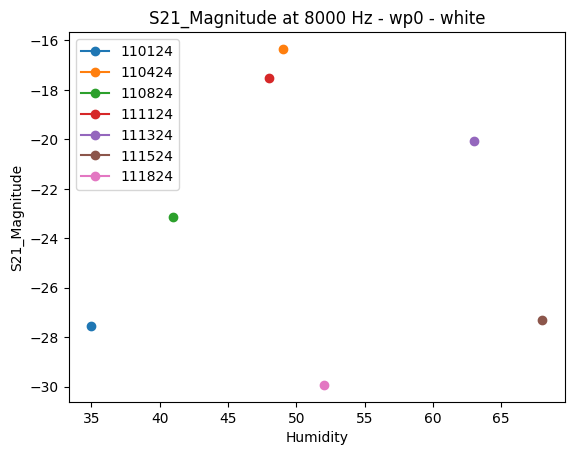

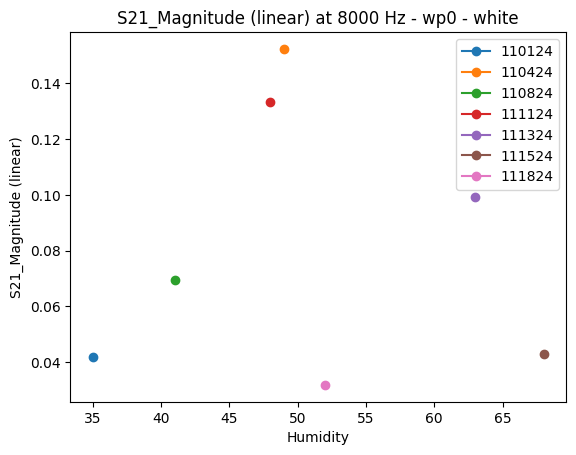

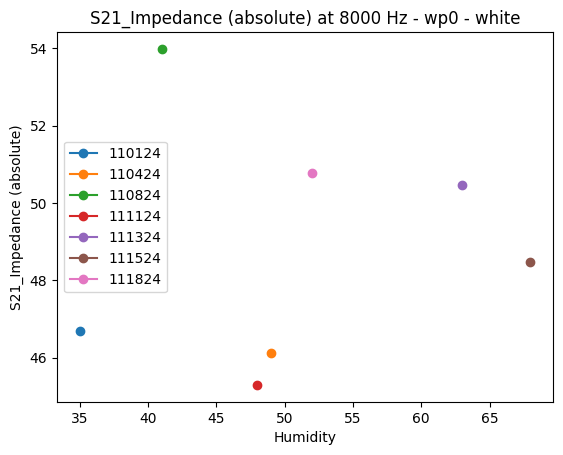

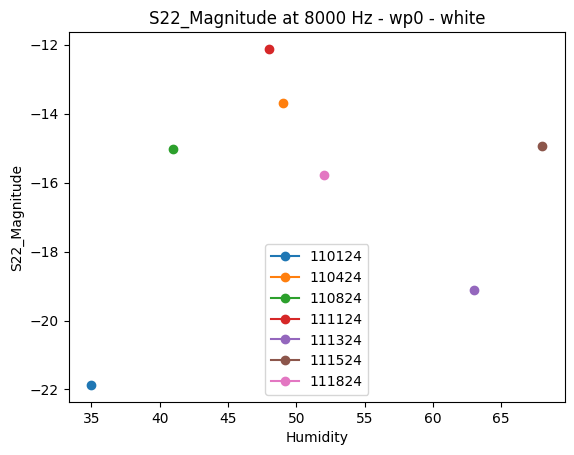

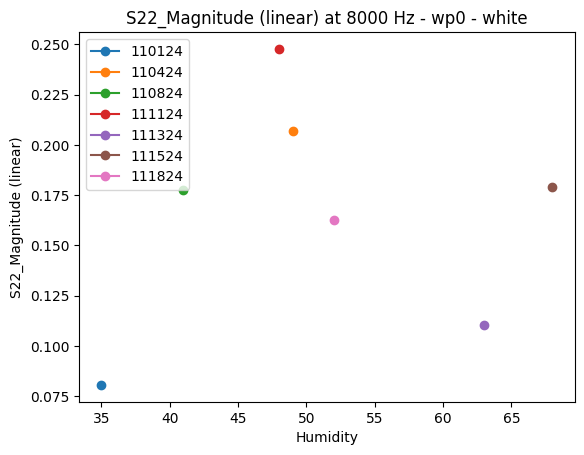

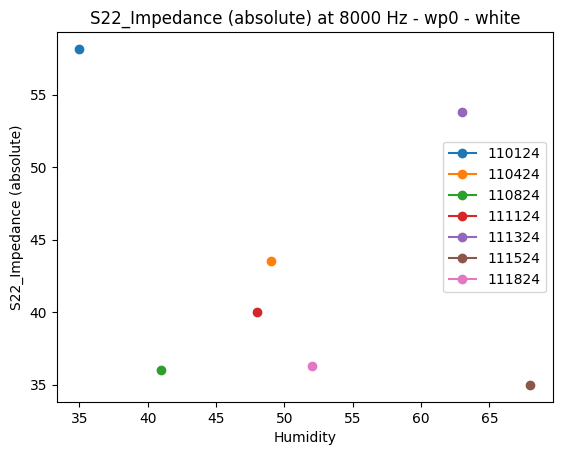

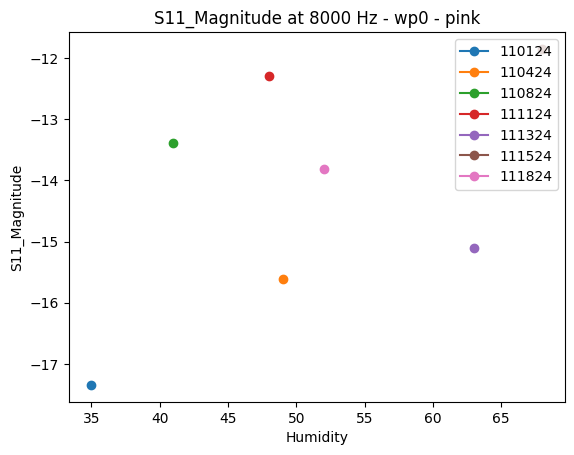

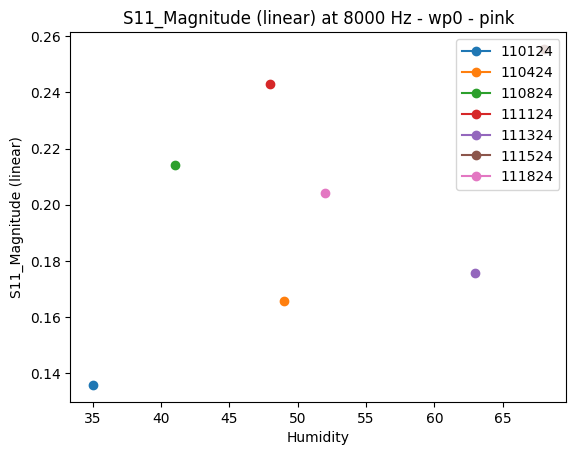

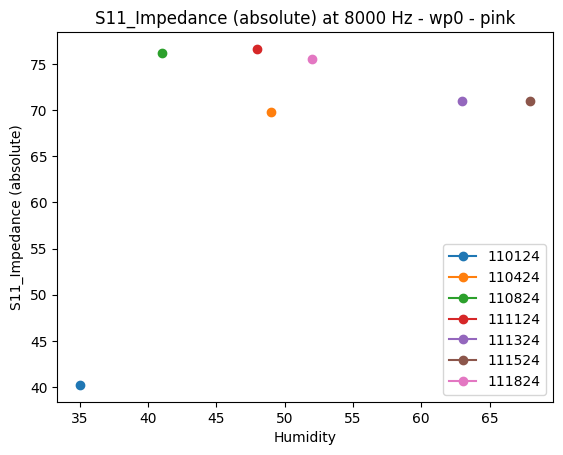

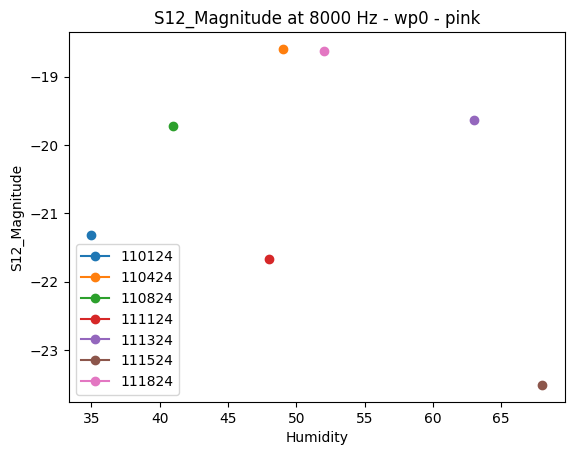

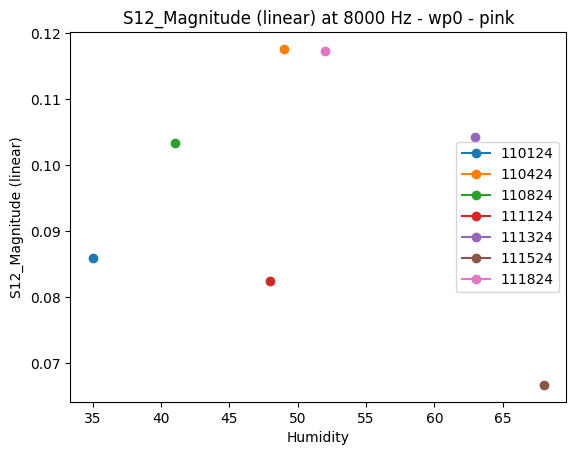

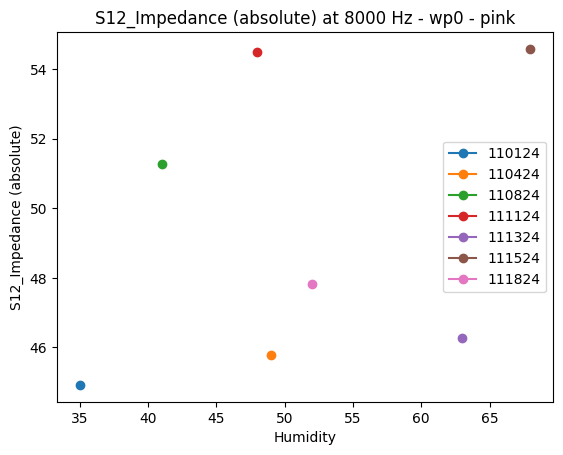

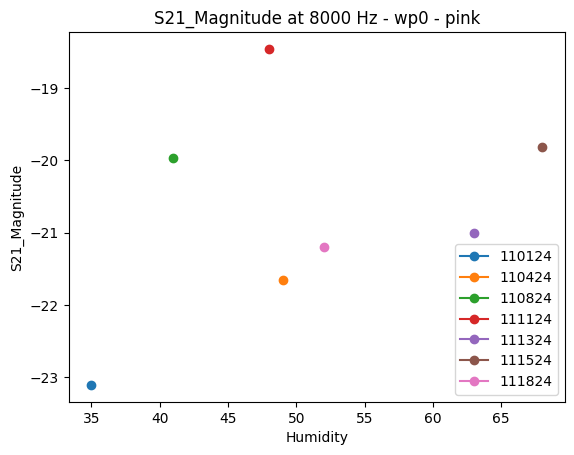

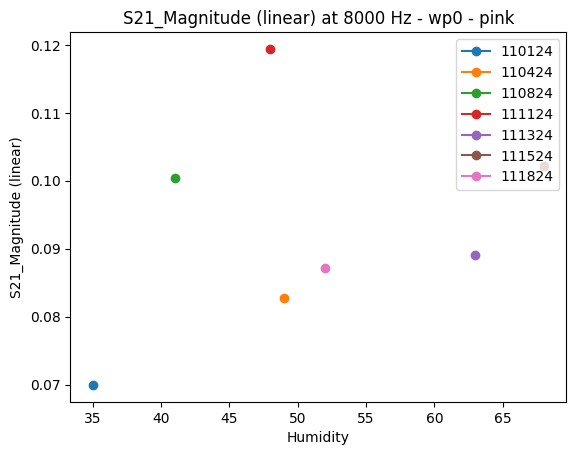

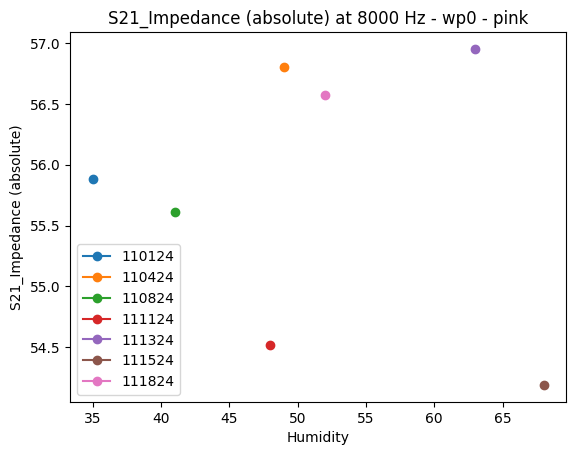

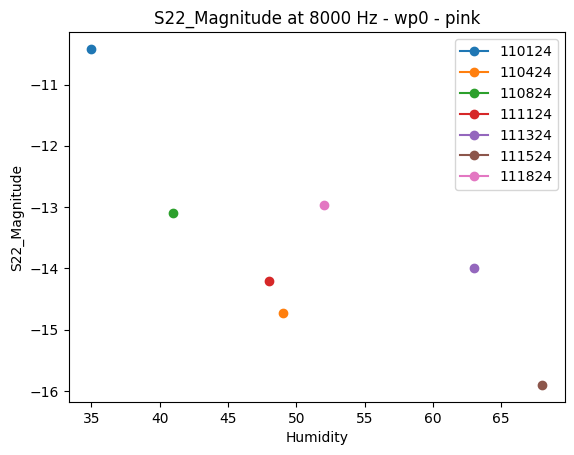

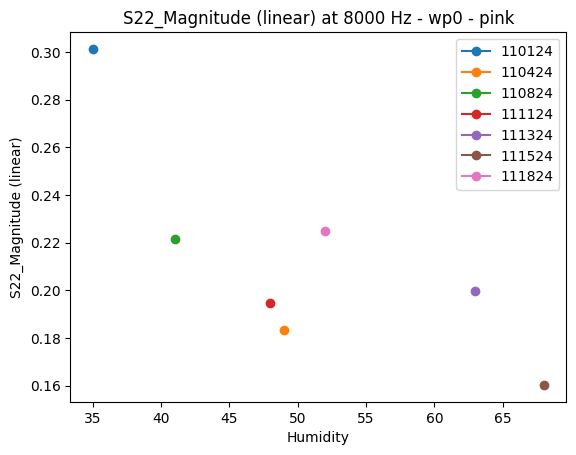

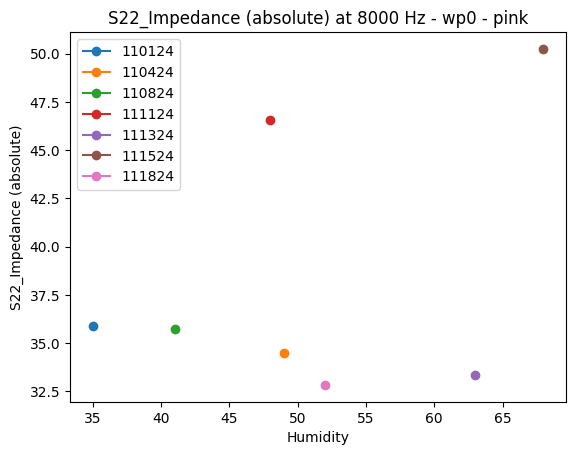

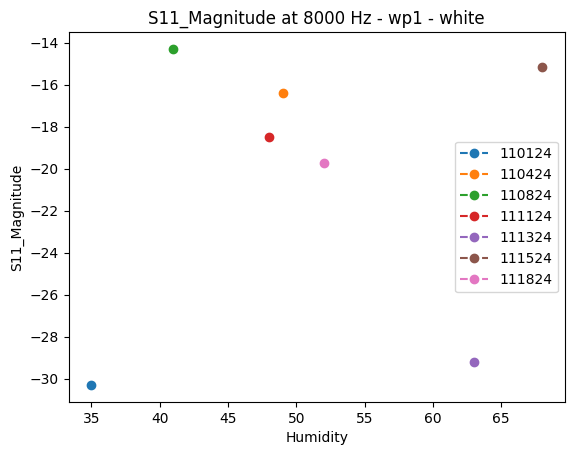

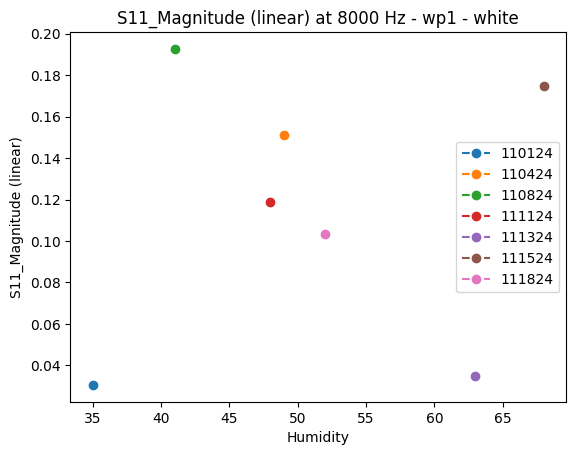

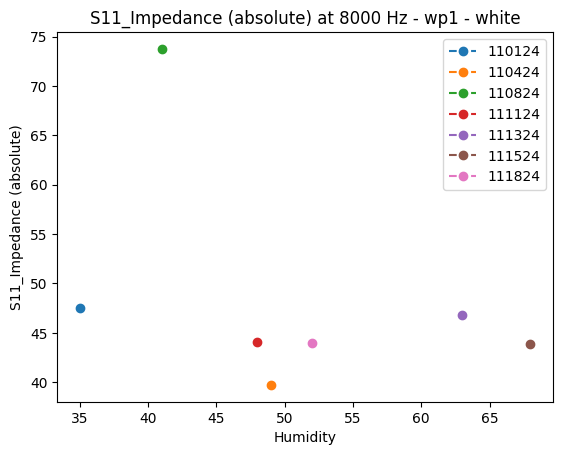

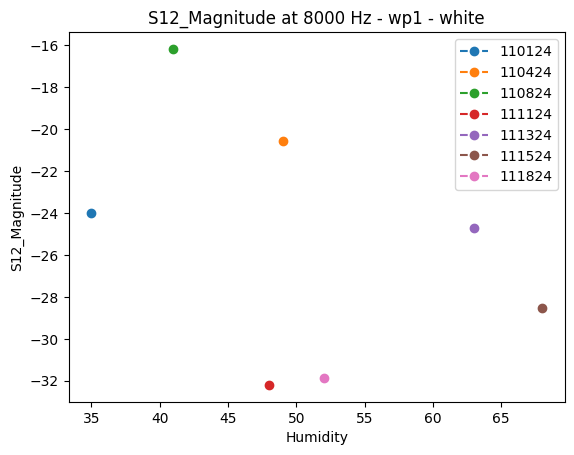

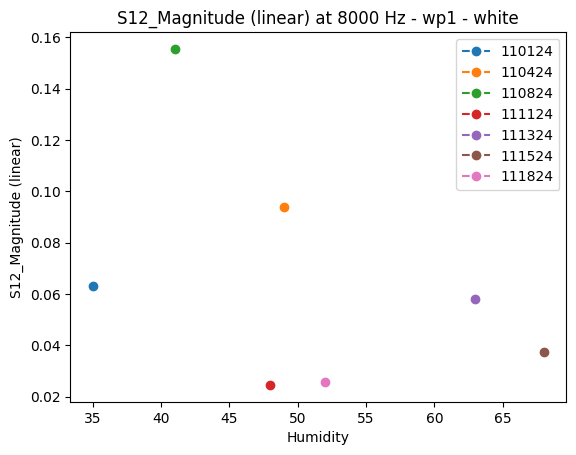

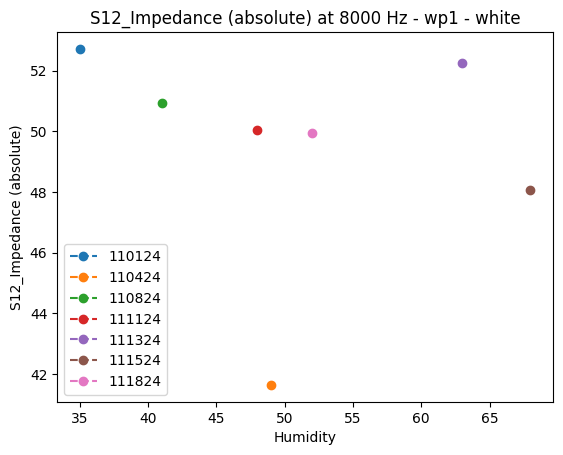

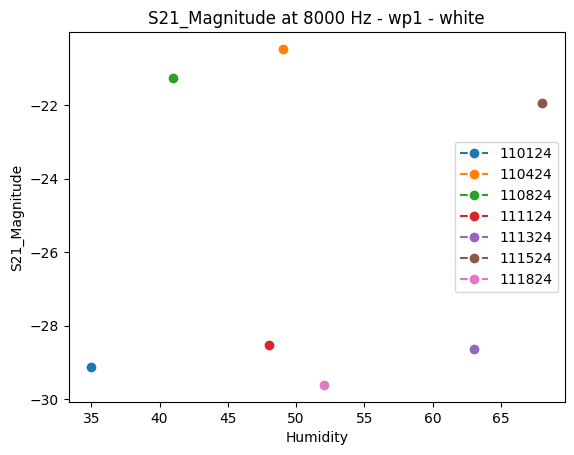

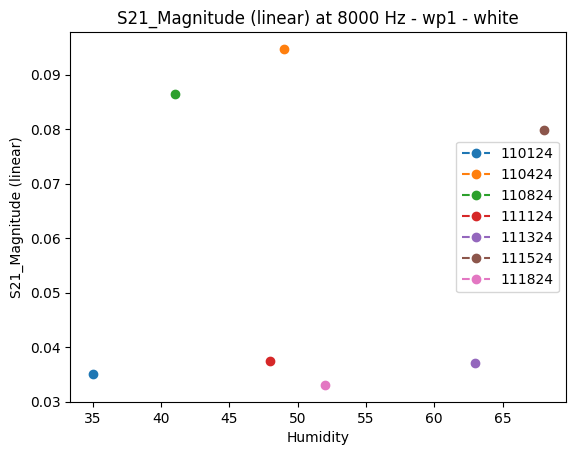

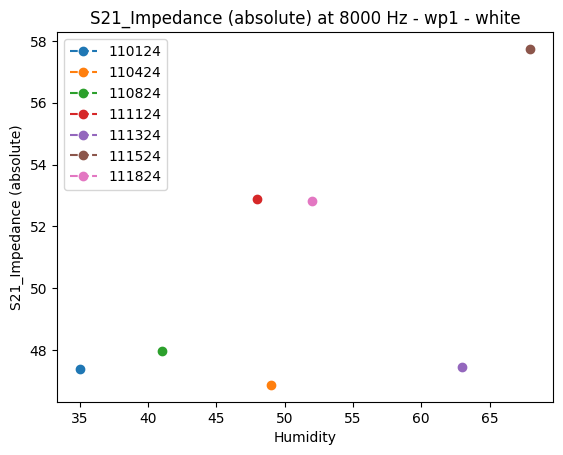

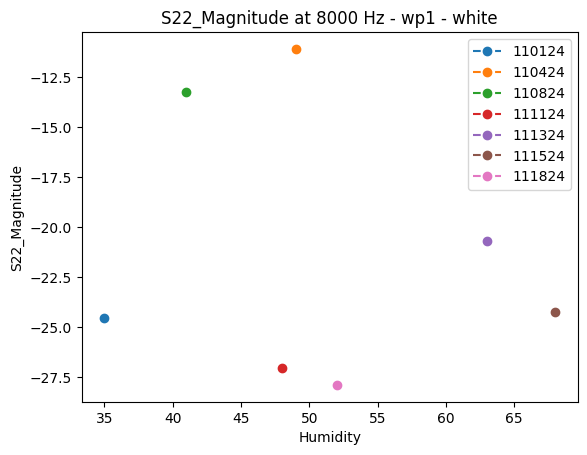

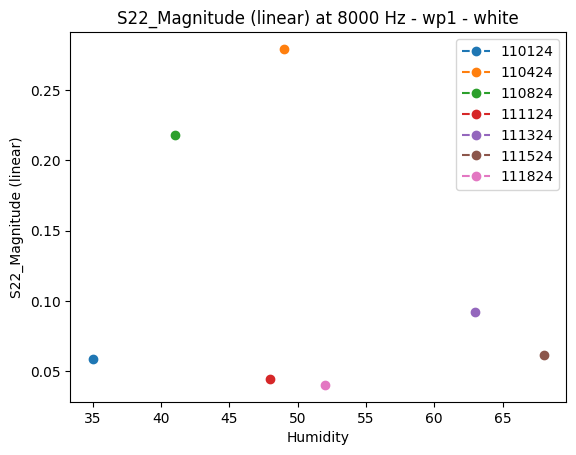

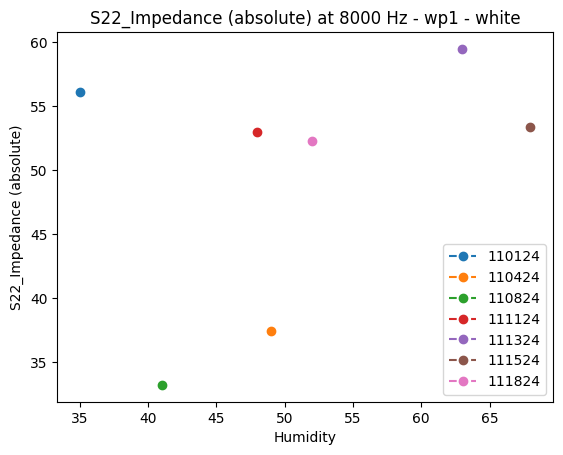

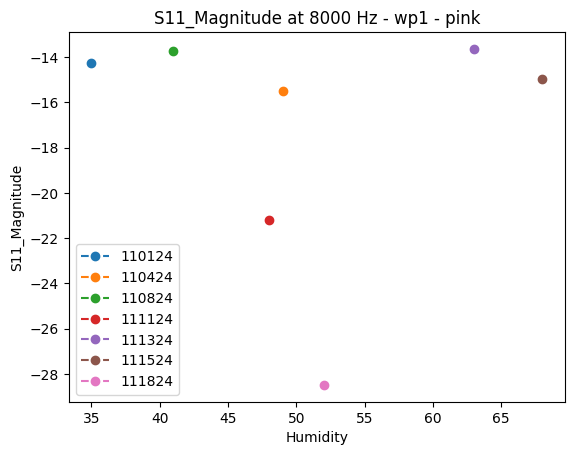

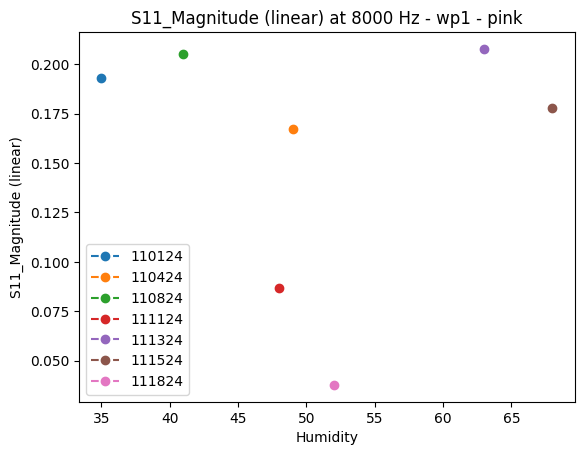

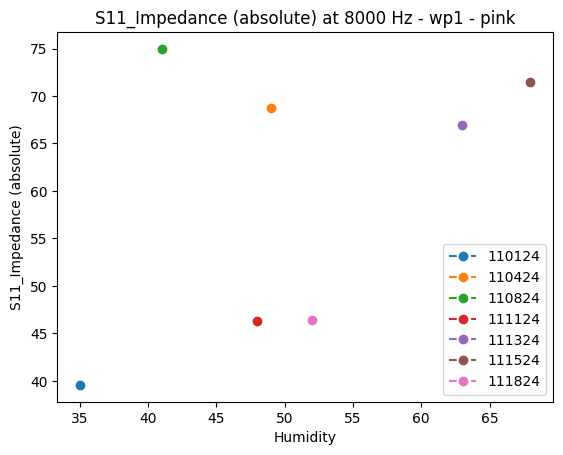

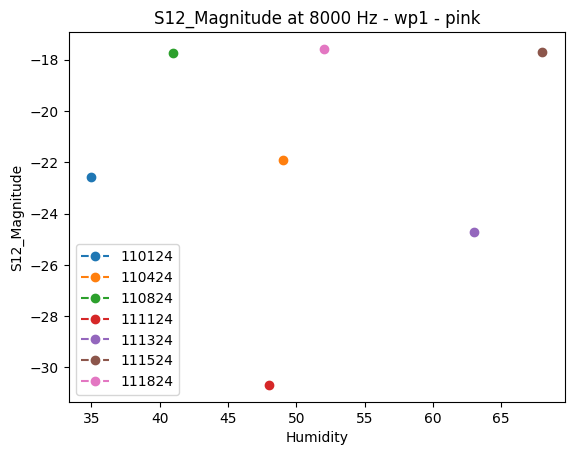

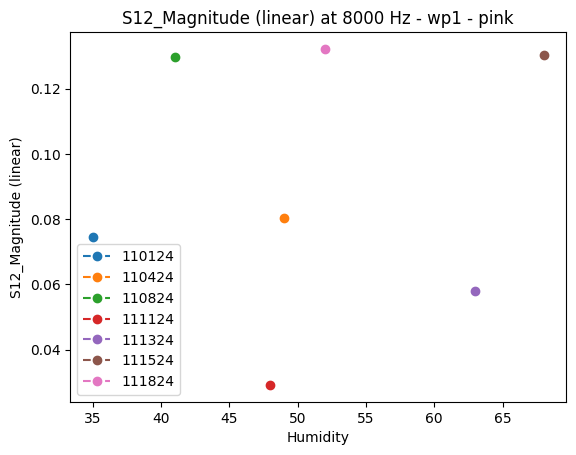

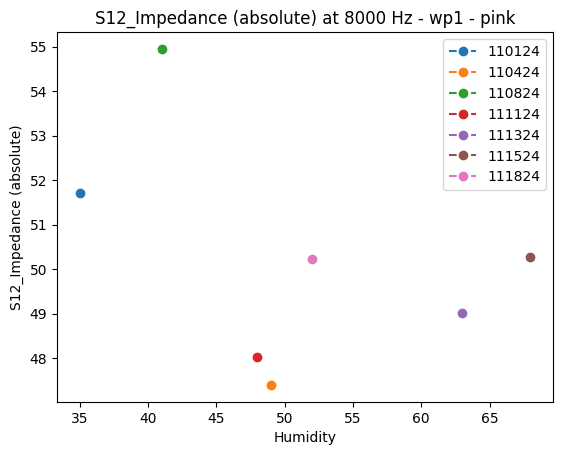

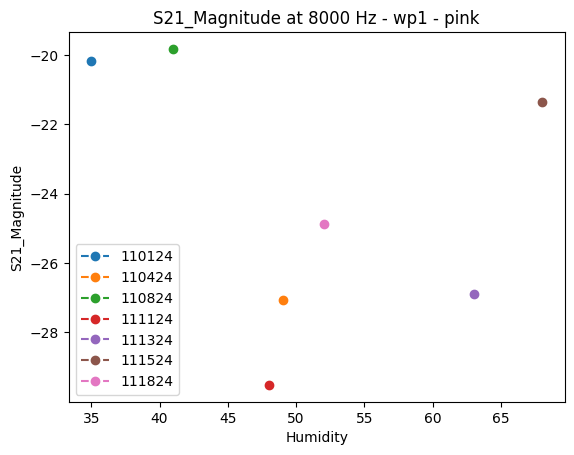

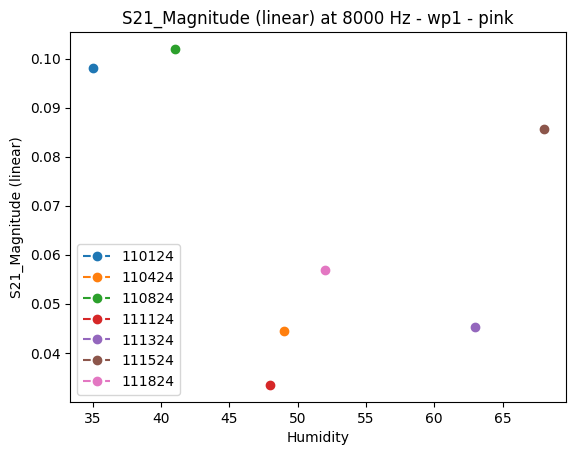

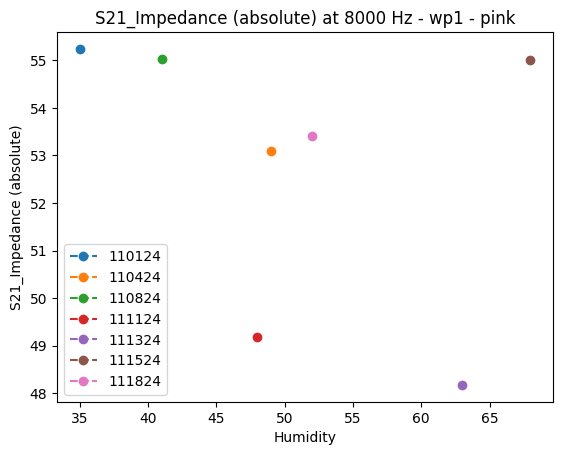

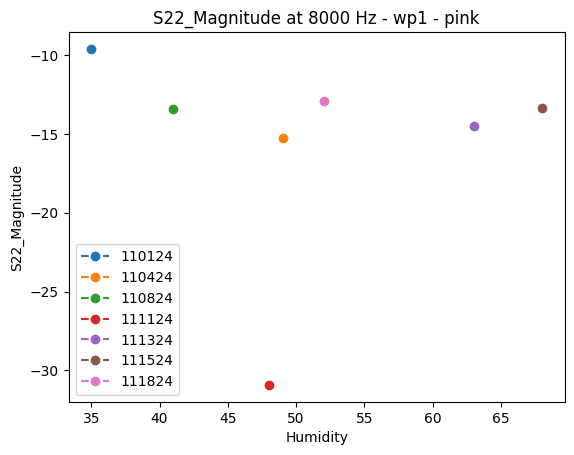

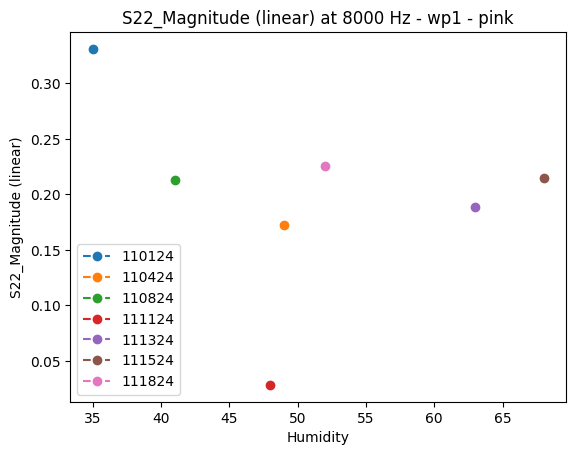

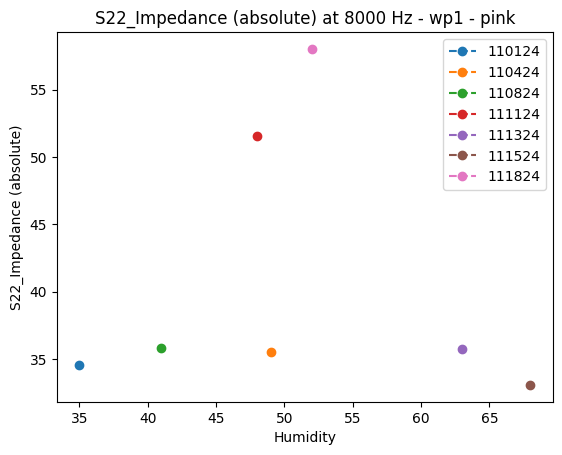

In [8]:
directory = '/home/victoria/work/icecube/service/nts/NTS_VNA'
processed_output_file = '/home/victoria/work/icecube/service/nts/NTS_VNA/processed_output.csv'

target_frequency = 8000
variable_keywords = ['magnitude', 'impedance']
x_axis_variable = 'Humidity'
# x_axis_variable = 'Wire Temp [C]'
# x_axis_variable = 'Air Temp [C]'
colors_to_plot = ['pink', 'grey']

plot_data_with_dates(directory, target_frequency, x_axis_variable, processed_output_file, variable_keywords=variable_keywords, colors=colors_to_plot)